len yA 1200


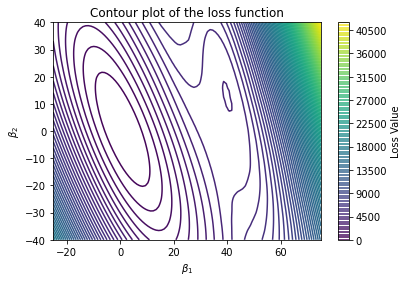

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
dataA = pd.read_csv('dataA.csv')
dataB = pd.read_csv('dataB.csv')

# convert to float
dataA = dataA.applymap(float)
dataB = dataB.applymap(float)
# Separate into covariates and labels
XA = dataA.iloc[:, :2].values
yA = dataA.iloc[:, 2].values
print('len yA',len(yA))
XB = dataB.iloc[:, :2].values
yB = dataB.iloc[:, 2].values

# Define the loss function
def loss_function(beta1, beta2):
    loss_A = (yA - beta1 * XA[:, 0] - beta2 * XA[:, 1]) ** 2
    loss_B = (yB - beta1 * XB[:, 0] - beta2 * XB[:, 1]) ** 2
    return (1 / (2 * len(yA))) * np.sum(np.minimum(loss_A, loss_B))

# Calculate loss for a grid of values
beta1_values = np.linspace(-25, 75, 100)
beta2_values = np.linspace(-40, 40, 100)

Z = np.zeros((len(beta1_values), len(beta2_values)))

for i, beta1 in enumerate(beta1_values):
    for j, beta2 in enumerate(beta2_values):
        Z[i, j] = loss_function(beta1, beta2)

# Plot contour plot
plt.contour(beta1_values, beta2_values, Z.T, 100, cmap='viridis')
plt.colorbar(label='Loss Value')
plt.xlabel('$\\beta_1$')
plt.ylabel('$\\beta_2$')
plt.title('Contour plot of the loss function')
plt.show()


[ 22.92725433 -20.69532099]
[ 17.96525281 -21.54464251]
[ 21.47662409 -20.34780179]
[ 27.8607187  -18.67430661]
[ 26.69716153 -18.48585848]
[ 18.67989838 -19.46418322]
[ 12.42609238 -20.3655097 ]
[  9.34681502 -20.58686721]
[ 10.3782838  -19.88654379]
[  9.9236525  -19.88050615]
[  8.13886755 -20.26200873]
[  6.64466455 -19.9540497 ]
[  5.21917485 -20.01316818]
[  4.97524711 -19.58996455]
[  5.83170162 -19.05945684]
[  5.24258366 -18.61376136]
[  4.97571968 -18.02672284]
[  3.57445006 -18.43569945]
[  2.50927425 -19.02577204]
[  3.61087312 -18.07367037]
[  3.82841468 -17.44545677]
[  3.3845694  -17.61061365]
[  3.55328978 -17.28041404]
[  4.18600059 -16.55426234]
[  4.12257521 -16.0023728 ]
[  4.1683292  -15.79777177]
[  3.74436479 -15.75163241]
[  3.48613523 -15.82653704]
[  3.71457899 -15.21642975]
[  5.3973383  -14.83874911]
[  4.64627964 -15.54886489]
[  5.17665278 -15.02768432]
[  6.56254431 -14.71533572]
[  5.17811917 -14.54476537]
[  3.69643943 -15.04394858]
[  3.72834274 -14.50

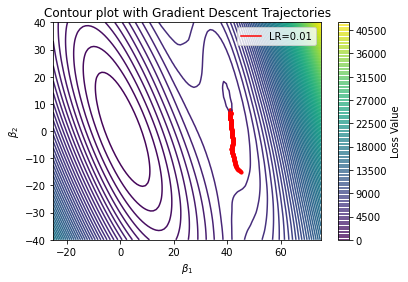

In [13]:
def gradient(beta1, beta2, XA, yA, XB, yB):
    # Compute residuals
    res_A = yA - beta1 * XA[:, 0] - beta2 * XA[:, 1]
    res_B = yB - beta1 * XB[:, 0] - beta2 * XB[:, 1]
    
    # Calculate squared residuals
    loss_A = res_A ** 2
    loss_B = res_B ** 2
    
    # Identify which dataset contributes to the gradient for each sample
    mask_A = loss_A <= loss_B
    mask_B = np.logical_not(mask_A)
    
    # Calculate gradients
    grad_beta1 = -np.sum(res_A[mask_A] * XA[mask_A, 0]) - np.sum(res_B[mask_B] * XB[mask_B, 0])
    grad_beta2 = -np.sum(res_A[mask_A] * XA[mask_A, 1]) - np.sum(res_B[mask_B] * XB[mask_B, 1])
    
    return np.array([grad_beta1 / len(yA), grad_beta2 / len(yB)])

# Gradient Descent function
def gradient_descent(XA, yA, XB, yB, learning_rate, iterations):
    beta = np.array([45, -15])  # starting point
    trajectory = [beta]

    for _ in range(iterations):
        grad = gradient(beta[0], beta[1], XA, yA, XB, yB)
        print(grad)
        beta = beta - learning_rate * grad
        trajectory.append(beta)

    return np.array(trajectory)

# Run gradient descent for both learning rates and store trajectories
trajectory_001 = gradient_descent(XA, yA, XB, yB, 0.01, 200)
trajectory_01 = gradient_descent(XA, yA, XB, yB, 0.1, 200)

# Plot contour plot with trajectories
plt.contour(beta1_values, beta2_values, Z.T, 100, cmap='viridis')
plt.colorbar(label='Loss Value')

plt.plot(trajectory_001[:, 0], trajectory_001[:, 1], 'r-', label='LR=0.01')
#plt.plot(trajectory_01[:, 0], trajectory_01[:, 1], 'b-', label='LR=0.1')
plt.scatter(trajectory_001[:, 0], trajectory_001[:, 1], c='red', s=10)
#plt.scatter(trajectory_01[:, 0], trajectory_01[:, 1], c='blue', s=10)

plt.xlabel('$\\beta_1$')
plt.ylabel('$\\beta_2$')
plt.title('Contour plot with Gradient Descent Trajectories')
plt.legend()
plt.show()


[ 22.92725433 -20.69532099]
[ 17.96525281 -21.54464251]
[ 21.47662409 -20.34780179]
[ 27.8607187  -18.67430661]
[ 26.69716153 -18.48585848]
[ 18.67989838 -19.46418322]
[ 12.42609238 -20.3655097 ]
[  9.34681502 -20.58686721]
[ 10.3782838  -19.88654379]
[  9.9236525  -19.88050615]
[  8.13886755 -20.26200873]
[  6.64466455 -19.9540497 ]
[  5.21917485 -20.01316818]
[  4.97524711 -19.58996455]
[  5.83170162 -19.05945684]
[  5.24258366 -18.61376136]
[  4.97571968 -18.02672284]
[  3.57445006 -18.43569945]
[  2.50927425 -19.02577204]
[  3.61087312 -18.07367037]
[  3.82841468 -17.44545677]
[  3.3845694  -17.61061365]
[  3.55328978 -17.28041404]
[  4.18600059 -16.55426234]
[  4.12257521 -16.0023728 ]
[  4.1683292  -15.79777177]
[  3.74436479 -15.75163241]
[  3.48613523 -15.82653704]
[  3.71457899 -15.21642975]
[  5.3973383  -14.83874911]
[  4.64627964 -15.54886489]
[  5.17665278 -15.02768432]
[  6.56254431 -14.71533572]
[  5.17811917 -14.54476537]
[  3.69643943 -15.04394858]
[  3.72834274 -14.50

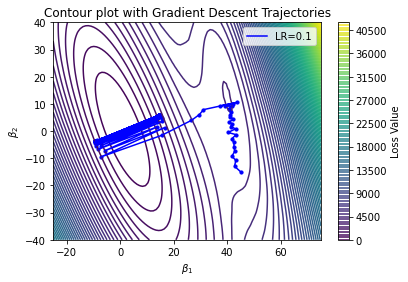

In [14]:
def gradient(beta1, beta2, XA, yA, XB, yB):
    # Compute residuals
    res_A = yA - beta1 * XA[:, 0] - beta2 * XA[:, 1]
    res_B = yB - beta1 * XB[:, 0] - beta2 * XB[:, 1]
    
    # Calculate squared residuals
    loss_A = res_A ** 2
    loss_B = res_B ** 2
    
    # Identify which dataset contributes to the gradient for each sample
    mask_A = loss_A <= loss_B
    mask_B = np.logical_not(mask_A)
    
    # Calculate gradients
    grad_beta1 = -np.sum(res_A[mask_A] * XA[mask_A, 0]) - np.sum(res_B[mask_B] * XB[mask_B, 0])
    grad_beta2 = -np.sum(res_A[mask_A] * XA[mask_A, 1]) - np.sum(res_B[mask_B] * XB[mask_B, 1])
    
    return np.array([grad_beta1 / len(yA), grad_beta2 / len(yB)])

# Gradient Descent function
def gradient_descent(XA, yA, XB, yB, learning_rate, iterations):
    beta = np.array([45, -15])  # starting point
    trajectory = [beta]

    for _ in range(iterations):
        grad = gradient(beta[0], beta[1], XA, yA, XB, yB)
        print(grad)
        beta = beta - learning_rate * grad
        trajectory.append(beta)

    return np.array(trajectory)

# Run gradient descent for both learning rates and store trajectories
trajectory_001 = gradient_descent(XA, yA, XB, yB, 0.01, 200)
trajectory_01 = gradient_descent(XA, yA, XB, yB, 0.1, 200)

# Plot contour plot with trajectories
plt.contour(beta1_values, beta2_values, Z.T, 100, cmap='viridis')
plt.colorbar(label='Loss Value')

#plt.plot(trajectory_001[:, 0], trajectory_001[:, 1], 'r-', label='LR=0.01')
plt.plot(trajectory_01[:, 0], trajectory_01[:, 1], 'b-', label='LR=0.1')
#plt.scatter(trajectory_001[:, 0], trajectory_001[:, 1], c='red', s=10)
plt.scatter(trajectory_01[:, 0], trajectory_01[:, 1], c='blue', s=10)

plt.xlabel('$\\beta_1$')
plt.ylabel('$\\beta_2$')
plt.title('Contour plot with Gradient Descent Trajectories')
plt.legend()
plt.show()


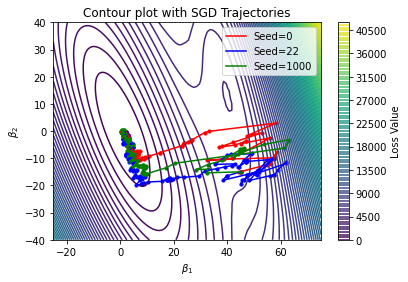

In [20]:
import numpy as np

def stochastic_gradient(beta1, beta2, x1, x2, yA, x1B, x2B, yB):
    # Compute residuals
    res_A = yA - beta1 * x1 - beta2 * x2
    res_B = yB - beta1 * x1B - beta2 * x2B
    
    # Calculate squared residuals
    loss_A = res_A ** 2
    loss_B = res_B ** 2
    
    # Decide which dataset contributes to the gradient
    if loss_A <= loss_B:
        return np.array([-res_A * x1, -res_A * x2])
    else:
        return np.array([-res_B * x1B, -res_B * x2B])

def stochastic_gradient_descent(XA, yA, XB, yB, learning_rate, iterations, seed=None):
    np.random.seed(seed)
    beta = np.array([45, -15])  # starting point
    trajectory = [beta]

    for _ in range(iterations):
        # Randomly select a sample
        idx = np.random.randint(0, len(yA))
        x1, x2 = XA[idx, 0], XA[idx, 1]
        x1B, x2B = XB[idx, 0], XB[idx, 1]
        grad = stochastic_gradient(beta[0], beta[1], x1, x2, yA[idx], x1B, x2B, yB[idx])
        
        beta = beta - learning_rate * grad
        trajectory.append(beta)

    return np.array(trajectory)

# Running SGD for three different random seeds
seeds = [0, 22, 1000]
trajectories = [stochastic_gradient_descent(XA, yA, XB, yB, 0.01, 200, seed=s) for s in seeds]

# Plotting
plt.contour(beta1_values, beta2_values, Z.T, 100, cmap='viridis')
plt.colorbar(label='Loss Value')

colors = ['r', 'b', 'g']
for traj, color, seed in zip(trajectories, colors, seeds):
    plt.plot(traj[:, 0], traj[:, 1], '-', color=color, label=f'Seed={seed}')
    plt.scatter(traj[:, 0], traj[:, 1], c=color, s=10)

plt.xlabel('$\\beta_1$')
plt.ylabel('$\\beta_2$')
plt.title('Contour plot with SGD Trajectories')
plt.legend()
plt.show()
